In [1]:
import pandas as pd
def read_n_agg(path):
    df=pd.read_csv(path, sep=';')
    df.groupby("company").agg({"income" : "mean"})
    return df

In [2]:
path = "F:\Lessons\companies.csv"
read_n_agg(path)

,company,income,date
0,"ЗАО «Доронин, Колобов и Калашникова»",1221331958,2019-09-09
1,ООО «Авдеев»,21116804375,1972-12-21
2,РАО «Аксенов Сорокина»,79257158759,2007-03-05
3,Ларионов Инкорпорэйтед,36799366126,2011-08-11
4,Григорьев Инкорпорэйтед,48201837498,1989-09-02
...,...,...,...
288,Сэтл групп,6152279994,2004-03-30
289,ОАО «Горшков Чернов»,26623978007,2004-03-30
290,НПО «Фадеев»,84314056422,1998-09-03
291,Петролеум Трейдинг,95528839292,1975-01-31


In [6]:
import pandas as pd
taxi=pd.read_csv(r'F:\Lessons\taxi_peru.csv', parse_dates=['start_at', 'end_at', 'arrived_at'], sep=';')


In [10]:
a=taxi_peru.source.value_counts(normalize=True)*100
a.round()

iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: source, dtype: float64

In [11]:
b=taxi.driver_score.value_counts(normalize=True).mul(100).round(2).reset_index()
b.rename(columns = {'index': 'driver_score', 'driver_score': 'percentage'}, inplace=True)
driver_score_counts=b.sort_values('driver_score')


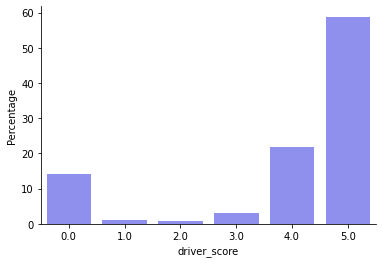

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='driver_score', ylabel='Percentage')
sns.despine()  
plt.show()


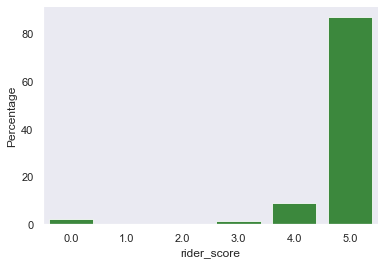

In [7]:
r=taxi.rider_score.value_counts(normalize=True).mul(100).round(2).reset_index()
r.rename(columns = {'index': 'rider_score', 'rider_score': 'percentage'}, inplace=True)
rider_score_counts=r.sort_values('rider_score')
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='green', alpha=0.8)
ax.set(xlabel='rider_score', ylabel='Percentage')
sns.despine()  
plt.show()


In [6]:
taxi.shape

(23111, 19)

In [4]:
taxi['wait_time']=(taxi.arrived_at-taxi.start_at).astype('timedelta64[m]')


In [34]:
taxi.query("wait_time >0 and start_type == 'reserved'").groupby('driver_id').agg({"driver_id":'count'}).idxmax()

driver_id    406921adcca37705ef527b4246c0cfea
dtype: object

In [2]:
import pandas as pd
inn=pd.read_excel(r'F:\Lessons\Lesson4\inn.xls')
necessary=pd.read_csv(r'F:\Lessons\Lesson4\necessary.txt', header=None) #Лучше укажите,что в таблице нет заголовков header=None, тогда автоматом в название колонки подставится 0
necessary.rename(columns={0 :'head_inn'}, inplace=True) #Затем переименуйте дефолтное значение 0 (ВАЖНО это не строка а число, поэтому не надо брать 0 в кавычки) и все. Проблем не будет)
necessary.head(2)

,head_inn
0,394609645484
1,281578625230


In [107]:
itog=inn.merge(necessary, how='inner', on='head_inn')
itog.shape #итоговая таблица верная
itog['income,RUB'].sum()

6104522627393

In [11]:
import datetime as dt
taxi['month']=taxi["start_at"].dt.month
taxi['weekday']=taxi["start_at"].dt.strftime("%A")
taxi.head(2)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,"-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,"-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,6,Tuesday


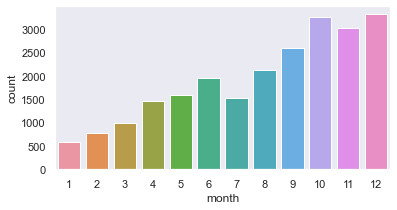

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3 )) #масштабирую
sns.set_theme(style="dark")
ax = sns.countplot(x="month", data=taxi)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='count'>

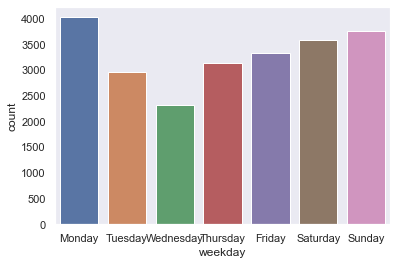

In [19]:
import seaborn as sns

sns.set_theme(style="dark")
sns.countplot(taxi['weekday'], order=['Monday', 'Tuesday', 'Wednesday', "Thursday", 'Friday', 'Saturday', 'Sunday'])
